In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from sklearn import metrics

In [2]:

from scipy import optimize
import numpy as np
from IPython.display import display, Math
seed = 12345512
np.random.seed(seed)

n = 100
x_data = np.linspace(-5, 5, num=n)
y_data = 10 + 5 * np.cos(3 * x_data + 2) + 1.5 * np.random.normal(size=n)
def test_func(x, dist, amp, omega, phi):
    return dist + amp * np.cos(omega * x + phi)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[1, 1, 2, 1])

print('Fitted parameters:')
display(Math('a_0={:.2f}, a_1={:.2f}, \\omega={:.2f}, \\phi={:.2f}'.format(*params)))
print('Original parameters:')
display(Math('a_0={:.2f}, a_1={:.2f}, \\omega={:.2f}, \\phi={:.2f}'.format(*[10.0, 5.0, 3.0, 2.0])))

Fitted parameters:


<IPython.core.display.Math object>

Original parameters:


<IPython.core.display.Math object>

In [3]:

def objective(a0, a1, w, f):
    """Objective function to minimize"""
    return np.mean((a0+ a1 * np.cos(w*X_train + f) - y_train)**2)

def objective2(args):
    return objective(*args)

from hyperopt import hp, tpe, Trials, fmin
from IPython.display import display, Math

space = [hp.uniform('a0', 5, 15),
         hp.uniform('a1', 0, 10), 
         hp.uniform('w', 0, 10), 
         hp.uniform('f', -np.pi, np.pi)]

tpe_algo = tpe.suggest
tpe_trials = Trials()

tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=1000)

print('Fitted parameters:')
display(Math('a_0={a0:.2f}, a_1={a1:.2f}, \\omega={w:.2f}, \\phi={f:.2f}'.format(**tpe_best)))
print('Original parameters:')
display(Math('a_0={:.2f}, a_1={:.2f}, \\omega={:.2f}, \\phi={:.2f}'.format(*[10.0, 5.0, 3.0, 2.0])))

100%|██████████| 1000/1000 [00:18<00:00, 55.19trial/s, best loss: 2.8787338483131575]
Fitted parameters:


<IPython.core.display.Math object>

Original parameters:


<IPython.core.display.Math object>

In [4]:
df = pd.read_csv('data.txt',header=None, sep=' ')

In [5]:
y_train = df.iloc[:, 1].values
x_train = df.iloc[:, 0].values

In [6]:
print(y_train)

[18960.59804327  2051.64298103  1314.92661865 ... 12272.4982934
   794.17429424 65611.55813711]


In [45]:
def test_func(x, a, b, c, da,db,dc):
    return ((a+da)*(np.e**x) + (b+db)*(x**0.75))**2 + (c+dc)*(np.cos(x)**2)


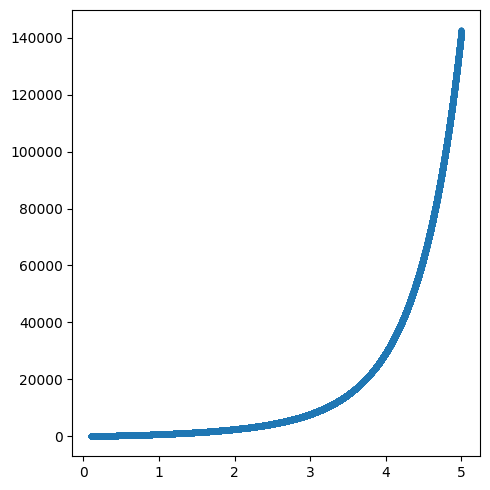

In [8]:
figure, ax  = plt.subplots(figsize=(5, 5))

ax.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', )

plt.tight_layout()
plt.show()

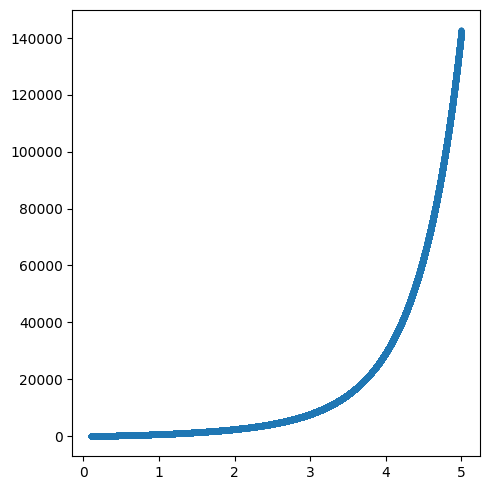

In [50]:
figure, ax  = plt.subplots(figsize=(5, 5))
y = [test_func(i, 2.09,20.22,-11.53, 0.000118,0.00066,-0.00056) for i in df.iloc[:, 0]]
ax.scatter(df.iloc[:, 0],y, marker='.', )

plt.tight_layout()

plt.show()

In [52]:
y = [test_func(i, 2.09,20.22,-11.53, 0.000118,0.00066,-0.00056) for i in df.iloc[:, 0]]
print(metrics.mean_squared_error(y_train,y))

601.0325238070266


In [35]:
da = (np.random.sample(int(1e5))-0.5)/500
print(max(da),min(da))

0.0009999933336176333 -0.0009999353049970415


In [36]:
da = (np.random.sample(int(1e5))-0.5)/500
db = (np.random.sample(int(1e5))-0.5)/500
dc = (np.random.sample(int(1e5))-0.5)/500

In [61]:
def objective(c,da,db,dc):
    """Objective function to minimize"""
    a=2.09
    b=20.22
    return np.mean((((a+da)*(np.e**x_train) + (b+db)*(x_train**0.75))**2 + (c+dc)*(np.cos(x_train)**2) - y_train)**2)

def objective2(args):
    return objective(*args)

space = [hp.uniform('c', 0, 50),
         hp.uniform('da', -0.001, 0.001),
         hp.uniform('db', -0.001, 0.001),
         hp.uniform('dc', -0.001, 0.001)]

tpe_algo = tpe.suggest
tpe_trials = Trials()

tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=1000)

print('Fitted parameters:')
display(Math('c={c:.2f},da={da:.5f},db={db:.5f},dc={dc:.5f}'.format(**tpe_best)))


100%|██████████| 1000/1000 [00:31<00:00, 32.08trial/s, best loss: 279.28657366511254]
Fitted parameters:


<IPython.core.display.Math object>

k = int(input())
book ={}
for i in range(k):
    word = input()
    if word not in book:
        book[word] = 1
print(len(book))

n, m = map(int,input().split())
book = [[] for _ in range(m+1)]
final = []
for i in range(n):
    obj = int(input())
    book[obj].append(i)
for i in range(n):
    for j in range(m):
        if i == 0 and j == 0:
            x = book[0].pop(0)
            final.append(x)
            k = 1
            print(x)
        else:
            if k == m+1:
                k=0
            elif book[k] != []:
                final.append(book[k].pop(0))
                k+=1
            else:
                k+=1
    
print(*final)

In [46]:
print(tpe_best)

{'a': 2.089311900126067, 'b': 20.221143754821785, 'c': -11.534744381528473, 'da': 0.0001184043398330487, 'db': 0.0006664590499713955, 'dc': -0.0005620215626137928}


In [54]:
y = [test_func(i, **tpe_best) for i in df.iloc[:, 0]]
print(metrics.mean_squared_error(y_train,y))

254.06003961635443
